#HW1 - Data Exploration and Preparation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recommended formatting settings

In [6]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)


## Loading the dataset

In [7]:
'''
#Google colab version
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]
'''

'\n#Google colab version\n!rm *.csv\n\nfrom google.colab import files\nprint("Please load the raw csv data")\nuploadedData = files.upload()\nfilename = list(uploadedData)[0]\n'

In [8]:
#Local machine version

filename = "virus_data.csv"


In [9]:
dataset = pd.read_csv(filename)

In [10]:
dataset.shape

(1250, 25)

Q2 - print the value_counts of converstaions_per_day

In [11]:
dataset.conversations_per_day.value_counts()


conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

(Q4)	Split the data randomly into a training set (80% of the data) and a test set (20% of the data)

In [12]:
from sklearn.model_selection import train_test_split
sum_of_last_2_digits_IDS=67
train_set , test_set = train_test_split(dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

(Q5)	For both the training set and test set, report which fields have missing values and how many missing values there are. You can use Panda's function isnull().

In [13]:
pd.isnull(train_set).sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         85
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [14]:
pd.isnull(test_set).sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         24
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

,patient_id,household_income
0,733,0.7
1,382,NaN
2,1164,1.5
3,897,0.5
4,1187,0.2
...,...,...
1245,607,0.4
1246,16,0.9
1247,776,1.2
1248,75,0.0


Q6 (Q6)	Plot a histogram (see Tutorial 01) for each field where you found missing values in (Q5). Add these plots to your report. Answer: Can you recognize outliers?
Reminder: Create plots using only the training set.


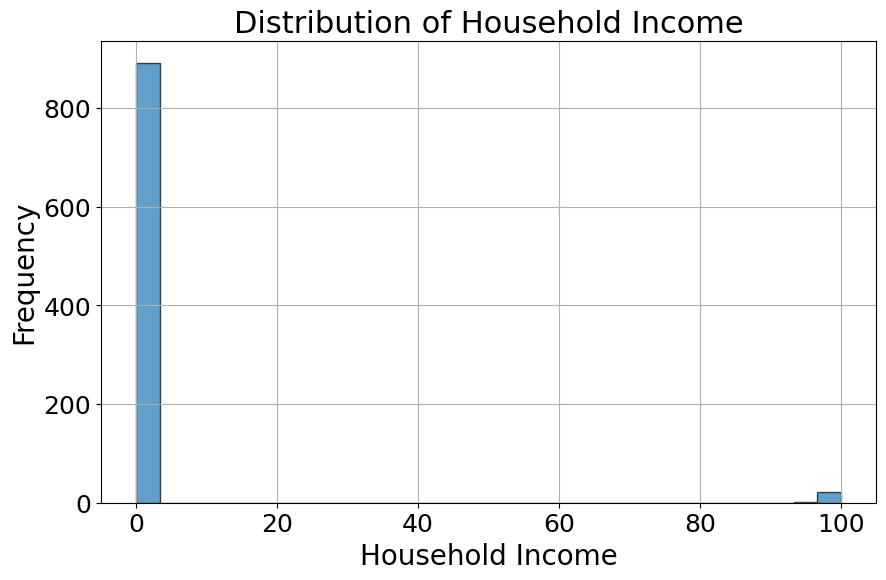

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(train_set['household_income'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(Q7)	For each field where you found missing values, calculate the median and the mean in the training set, and report it. 
If there is a significant difference between the mean and median values, explain the reason. Which filling method do you prefer to use in our case, and why?


In [28]:
print ("the mean of the household income is: ", train_set['household_income'].mean()," and the median is: ", train_set['household_income'].median())

the mean of the household income is:  3.209617486338798  and the median is:  0.7


# How to download from Colab?

In [16]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

ModuleNotFoundError: No module named 'google'